In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from keras.layers import InputLayer,Dense ,Dropout
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv("gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data.drop(['TIT','CDP'],axis=1,inplace=True)
data.head()

,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,550.00,114.70,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,550.00,114.72,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,549.87,114.71,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,549.99,114.72,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,549.98,114.72,3.2484,82.311


In [4]:
print(data.dtypes)
print(data.isnull().sum())
data.describe(include='all')

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TAT     float64
TEY     float64
CO      float64
NOX     float64
dtype: object
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TAT     0
TEY     0
CO      0
NOX     0
dtype: int64


,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,545.396183,134.188464,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,7.866803,15.829717,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,512.450000,100.170000,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,542.170000,127.985000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,549.890000,133.780000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,550.060000,140.895000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,550.610000,174.610000,44.103000,119.890000


In [5]:
data.shape

(15039, 9)

In [6]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.338569,-0.207495,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,-0.223479,0.146939,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,0.010859,-0.110272,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,-0.571541,0.717995,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,-0.756884,0.977042,-0.508259,-0.208496
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,1.000000,-0.720356,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,-0.720356,1.000000,-0.541751,-0.102631
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,0.063404,-0.541751,1.000000,0.316743
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,0.009888,-0.102631,0.316743,1.000000


## `Correlation Data in form of Heat Map`

Text(0.5, 1.0, 'Correlation Heatmap')

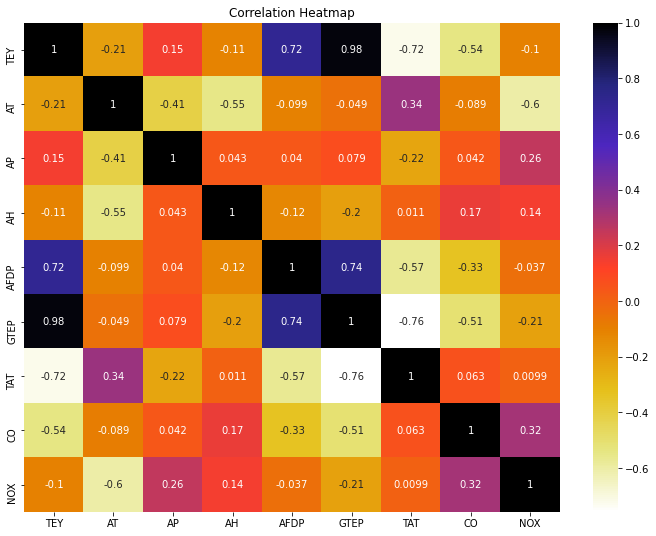

In [35]:
plt.figure(figsize=(12,9))
cor= data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap')

## `Boxplot for TEY`

<function matplotlib.pyplot.show(close=None, block=None)>

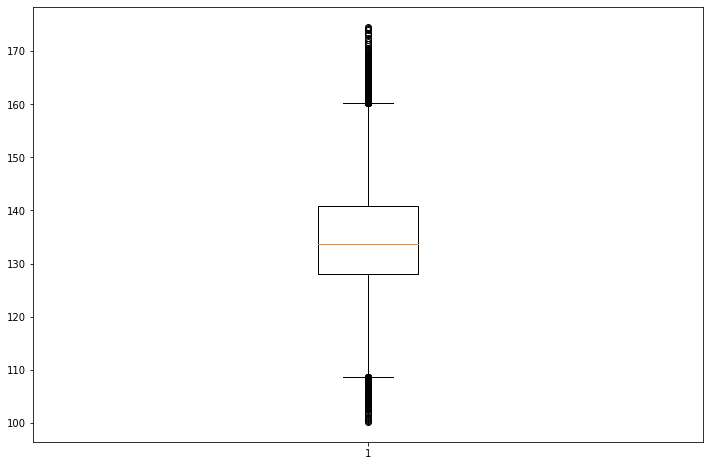

In [8]:
plt.figure(figsize=(12,8))
plt.boxplot(data.TEY)
plt.show

## `Histogram for AP`

<AxesSubplot:>

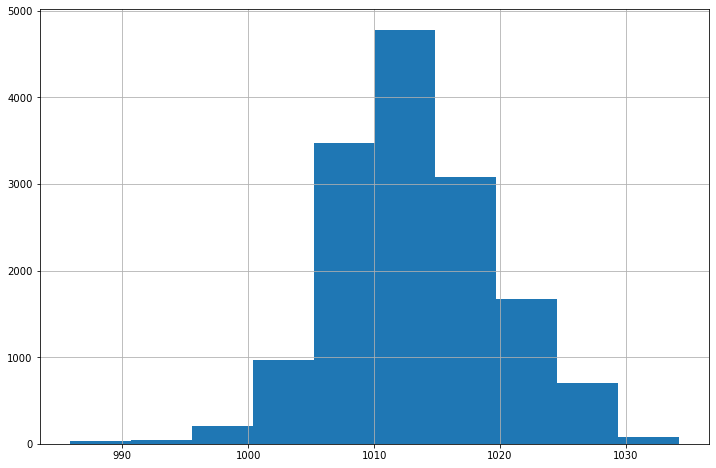

In [9]:
plt.figure(figsize=(12,8))
data.AP.hist()

## `Histogram for GTEP`

<AxesSubplot:>

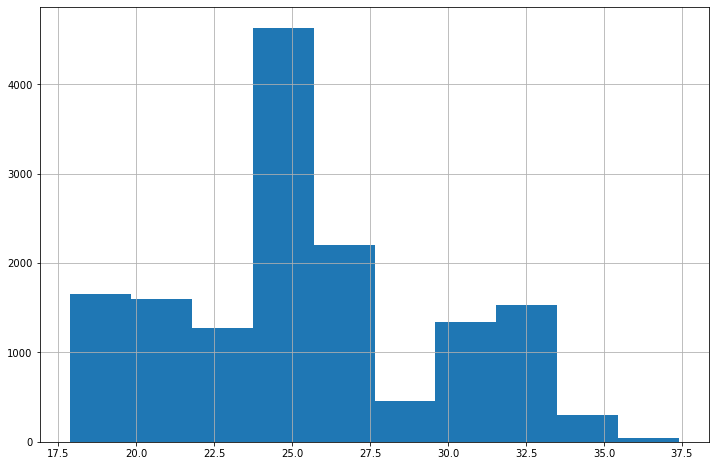

In [10]:
plt.figure(figsize=(12,8))
data.GTEP.hist()

## `Histogram for CDP`

<AxesSubplot:>

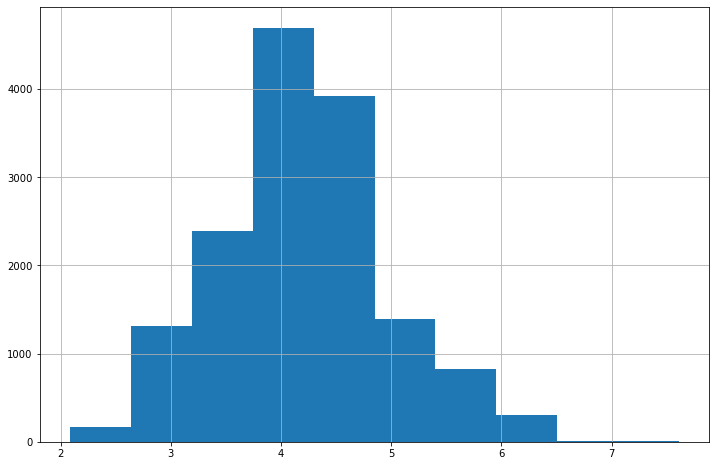

In [11]:
plt.figure(figsize=(12,8))
data.AFDP.hist()

## `Scatter Plot for TEY & AP`

<AxesSubplot:xlabel='TEY', ylabel='AP'>

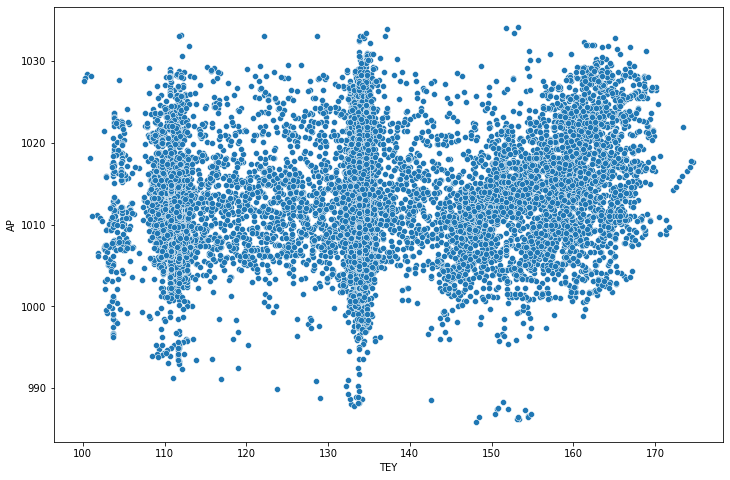

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TEY',y='AP',data=data)

In [13]:
lst=data.pop('TEY')
data.insert(0,'TEY',lst)
print(data.head())
x =data.drop('TEY',axis=1)
y =data.TEY

      TEY      AT      AP      AH    AFDP    GTEP     TAT      CO     NOX
0  114.70  6.8594  1007.9  96.799  3.5000  19.663  550.00  3.1547  82.722
1  114.72  6.7850  1008.4  97.118  3.4998  19.728  550.00  3.2363  82.776
2  114.71  6.8977  1008.8  95.939  3.4824  19.779  549.87  3.2012  82.468
3  114.72  7.0569  1009.2  95.249  3.4805  19.792  549.99  3.1923  82.670
4  114.72  7.3978  1009.7  95.150  3.4976  19.765  549.98  3.2484  82.311


## `Applying Standard Scaler Function`

In [14]:
#spliting data for training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.1,random_state=42)

sc_train = StandardScaler()
sc_test= StandardScaler()

x_train_sc=sc_train.fit_transform(x_train)
x_test_sc=sc_test.fit_transform(x_test)

print(x_train_sc.shape)
print(x_test_sc.shape)

(13535, 8)
(1504, 8)


## `Applying Neural Network`

In [16]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
# Adding the input layer and first hidden layer 
classifier.add(Dense(units=30, activation= "relu", input_dim=8))
classifier.add(Dropout(0.2))
# Adding second hidden layer
classifier.add(Dense(units=35,  activation= "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=30, activation= "relu"))
classifier.add(Dropout(0.2))
# Adding the output layer
classifier.add(Dense(units=1,  activation= "linear"))
# Compling the ANN
classifier.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])

In [17]:
model_history = classifier.fit(x_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
948/948 [==============================] - 5s 4ms/step - loss: 2012.3730 - mae: 33.7875 - mse: 2012.3730 - val_loss: 2753.9812 - val_mae: 50.0524 - val_mse: 2753.9812
Epoch 2/100
948/948 [==============================] - 3s 3ms/step - loss: 961.0767 - mae: 24.6057 - mse: 961.0767 - val_loss: 2136.4946 - val_mae: 43.7943 - val_mse: 2136.4946
Epoch 3/100
948/948 [==============================] - 3s 3ms/step - loss: 769.7526 - mae: 22.0426 - mse: 769.7526 - val_loss: 1894.7202 - val_mae: 41.9145 - val_mse: 1894.7202
Epoch 4/100
948/948 [==============================] - 4s 4ms/step - loss: 632.7732 - mae: 19.8430 - mse: 632.7732 - val_loss: 2156.3257 - val_mae: 45.3097 - val_mse: 2156.3257
Epoch 5/100
948/948 [==============================] - 3s 3ms/step - loss: 588.1008 - mae: 19.0562 - mse: 588.1008 - val_loss: 1760.8916 - val_mae: 41.2479 - val_mse: 1760.8916
Epoch 6/100
948/948 [==============================] - 4s 4ms/step - loss: 542.8465 - mae: 18.3152 - mse: 542.846

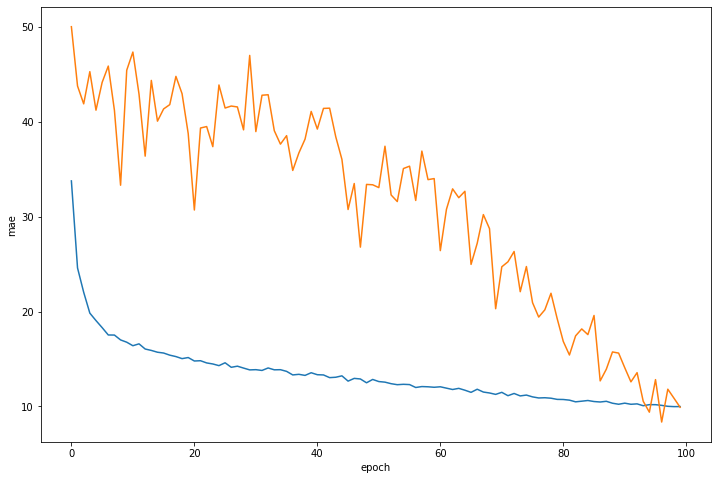

In [18]:
plt.figure(figsize=(12,8))
plt.xlabel("epoch")
plt.ylabel("mae")
plt.plot(model_history.epoch, model_history.history["mae"] )
plt.plot(model_history.epoch, model_history.history["val_mae"] )
plt.show()

In [19]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [20]:
# Predicting the test 
y_pred = classifier.predict(x_test)
y_pred

array([[124.39948],
       [109.75762],
       [124.01505],
       ...,
       [143.45023],
       [123.86224],
       [109.77415]], dtype=float32)

In [21]:
y_test= y_test.reset_index(drop= True)
y_test

0       134.46
1       111.88
2       133.72
3       133.79
4       110.77
         ...  
1499    132.85
1500    125.07
1501    160.95
1502    133.12
1503    111.79
Name: TEY, Length: 1504, dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test, y_pred)

0.4976974480846291

In [23]:
mean_absolute_error(y_test, y_pred)

9.935479473763325

In [24]:
mean_squared_error(y_test, y_pred)

127.23429192068761

In [25]:
pred_df= pd.DataFrame(y_pred, columns=["TEY"])
cpm_df=pd.concat([y_test, pred_df], axis=1, ignore_index=False)
cpm_df.columns= ["Actual_TEY", "Predicted_TEY"]
cpm_df.head()

,Actual_TEY,Predicted_TEY
0,134.46,124.399483
1,111.88,109.757622
2,133.72,124.015053
3,133.79,124.328903
4,110.77,109.148544


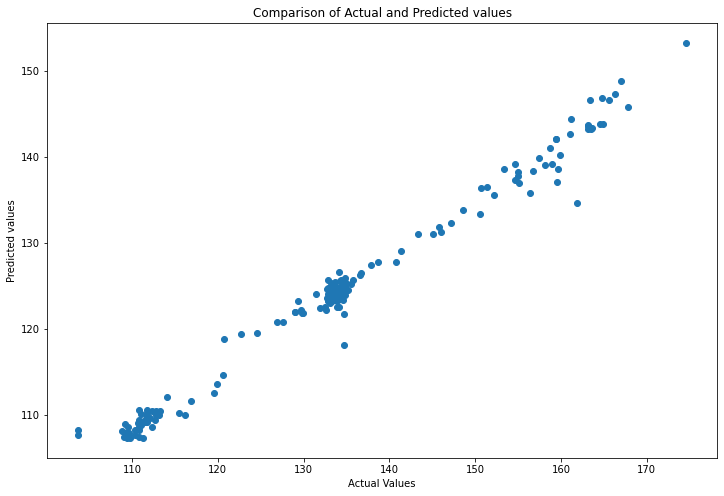

In [26]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Comparison of Actual and Predicted values")
plt.scatter(cpm_df.iloc[0:200, 0], cpm_df.iloc[0:200, 1])